In [34]:
# imports and load Vectorized data

import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# load saved objects
tfidf = joblib.load('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/tfidf_vectorizer.pkl')
le = joblib.load('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/label_encoder.pkl')
X_train_tfidf, X_test_tfidf, y_train, y_test = joblib.load('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/vectorized_data.pkl')

print("Data loaded successfully.")

Data loaded successfully.


In [33]:
# Logistic Regression Model

log_reg = LogisticRegression(max_iter=300, n_jobs=-1)
log_reg.fit(X_train_tfidf, y_train)

# Make predictions on test set (fixed variable name)
y_pred_lr = log_reg.predict(X_test_tfidf)  

print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_lr, average='weighted'))

Logistic Regression Results:
Accuracy: 0.2918238993710692
F1 Score: 0.23383251722293433


In [35]:
# Random Forest Model

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)

print('Random Forest Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))   
print('F1 Score:', f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest Results:
Accuracy: 0.14088050314465408
F1 Score: 0.1234976108378174


In [45]:
# Detailed classification report for Logistic Regression

print('\n === Logistic Regression Classification Report ===')
print(classification_report(y_test, y_pred_lr, target_names=present_names))
print('\n === Random Forest Report ===')
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


 === Logistic Regression Classification Report ===
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         5
    Cardiovascular / Pulmonary       0.25      0.28      0.26        50
                  Chiropractic       0.00      0.00      0.00         4
    Consult - History and Phy.       0.24      0.66      0.35        70
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         5
                     Dentistry       0.00      0.00      0.00         5
                   Dermatology       0.00      0.00      0.00         6
          Diets and Nutritions       0.00      0.00      0.00         6
             Discharge Summary       0.24      0.54      0.33        13
          ENT - Otolaryngology       0.50      0.17      0.25        12
        Eme

c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

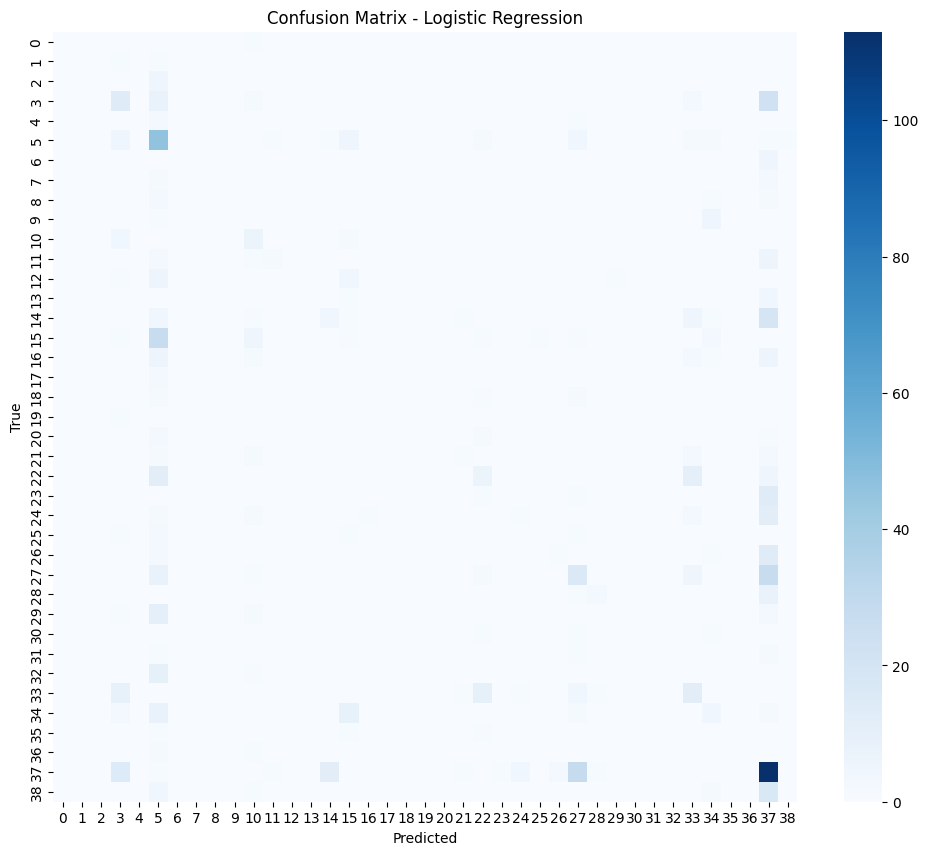

In [46]:
# Confusion Matrix Visualization

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [47]:
# Save the Best Model

best_model = log_reg  # or rf if it performs better
joblib.dump(best_model, Path('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/best_model.pkl'))
print("Best baseline model saved successfully.")

Best baseline model saved successfully.


In [48]:
# Test the saved model

sample = ['The patient was addmitted for severe chest pain and underwent angioplasty.']
sample_tfidf = tfidf.transform(sample)
pred = best_model.predict(sample_tfidf)
print('Predicted Specialty:', le.inverse_transform(pred)[0])

Predicted Specialty:  Cardiovascular / Pulmonary
